# Исследовательский анализ данных, предобработка данных и обучение алгоритмов классификации на примере данных total.csv
1. [Исследовательский анализ данных](#Libraries)
1. [Предобработка данных](#FirstStep)
1. [Выбор признаков для моделей классификации](#NewData) 
1. [Обучение моделей классификации](#NewData1) 

<a id="Libraries"></a>
## 1. Исследовательский анализ данных

In [1]:
import pandas as pd #Загрузим библиотеки
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('total_data.csv') # посмотрим на данные
data.head(3)

,request_id,age,spoke_with_agent,documents_send,documents_recieved,flag,delivery_pickup,session_duration,bounce_rate,sessions,visited_partners,step_1,step_2,step_3,user_type
0,853b5d24c44a1bd3255c679fe10ae1fd,45,0,0,0,0,not_stated,0.0,1.0,1,0,0,0,0,new
1,853b5d24c44a1bd3255c679fe10ae1fd,45,0,0,0,0,delivery,171.0,0.0,1,0,1,0,0,old
2,7ae319b1bd27ca5eaf622a9421a3014d,31,1,0,0,0,pickup,40.0,0.0,1,0,0,0,0,new


### Описание данных
- request_id - id заявки на сайте на создание мебели;
- age - возраст клиента;
- spoke_with_agent - говорил ли пользователь с оператором
- documents_send - клиент отправил дополнительные данные
после того, как отправил заявку с сайта
- documents_recieved - одна из наших мастерских получила эти
сведения
- delivery_pickup - тип доставки, указанной при заявке на сайте
- session_duration - длительность сессии в секундах
- bounce_rate - доля “некачественных” сессий на сайте у
пользователя
- sessions - суммарное количество сессий пользователя для
конкретной заявки
- visited_partners - посещал сайты партнеров
- step_1, step_2, step_3 - дошел до 1-го, 2-го, 3-го этапа
заполнения заявки на сайте
- user_type - тип пользователя (старый, новый)
- flag - совершил ли пользователь покупку (целевая
переменная)

Воспользуемся функцией info из которой мы узнаем, что в таблице: 8471 строка, 15 столбцов

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8471 entries, 0 to 8470
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   request_id          8471 non-null   object 
 1   age                 8471 non-null   int64  
 2   spoke_with_agent    8471 non-null   int64  
 3   documents_send      8471 non-null   int64  
 4   documents_recieved  8471 non-null   int64  
 5   flag                8471 non-null   int64  
 6   delivery_pickup     8471 non-null   object 
 7   session_duration    8471 non-null   float64
 8   bounce_rate         8471 non-null   float64
 9   sessions            8471 non-null   int64  
 10  visited_partners    8471 non-null   int64  
 11  step_1              8471 non-null   int64  
 12  step_2              8471 non-null   int64  
 13  step_3              8471 non-null   int64  
 14  user_type           8471 non-null   object 
dtypes: float64(2), int64(10), object(3)
memory usage: 992.8

In [4]:
data=data.drop_duplicates()# воспользуемся функцией drop_duplicates, для удаления дупликатов записей при их наличии
data.shape

(8471, 15)

In [5]:
import scipy
def normalit (x): # Посмотрим какое у нас распределение
    x=x._get_numeric_data()
    for i in x.columns:
        stat, p = scipy.stats.normaltest(data[i]) # Критерий согласия Пирсона
        alpha = 0.05
        if p > alpha:
            print('Принять гипотезу о нормальности :', i)
        else:
            print('Отклонить гипотезу о нормальности :', i)

In [6]:
normalit(data)

Отклонить гипотезу о нормальности : age
Отклонить гипотезу о нормальности : spoke_with_agent
Отклонить гипотезу о нормальности : documents_send
Отклонить гипотезу о нормальности : documents_recieved
Отклонить гипотезу о нормальности : flag
Отклонить гипотезу о нормальности : session_duration
Отклонить гипотезу о нормальности : bounce_rate
Отклонить гипотезу о нормальности : sessions
Отклонить гипотезу о нормальности : visited_partners
Отклонить гипотезу о нормальности : step_1
Отклонить гипотезу о нормальности : step_2
Отклонить гипотезу о нормальности : step_3


Как видно, наши данные распределены не нормально

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'spoke_with_agent'}>,
        <AxesSubplot:title={'center':'documents_send'}>],
       [<AxesSubplot:title={'center':'documents_recieved'}>,
        <AxesSubplot:title={'center':'flag'}>,
        <AxesSubplot:title={'center':'session_duration'}>],
       [<AxesSubplot:title={'center':'bounce_rate'}>,
        <AxesSubplot:title={'center':'sessions'}>,
        <AxesSubplot:title={'center':'visited_partners'}>],
       [<AxesSubplot:title={'center':'step_1'}>,
        <AxesSubplot:title={'center':'step_2'}>,
        <AxesSubplot:title={'center':'step_3'}>]], dtype=object)

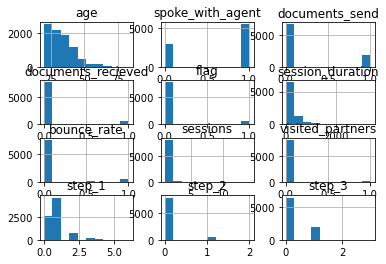

In [7]:
data.hist() # Визуализируем распределение данных

In [8]:
data.describe()#  воспользуемся функцией describe, посмотрим на статистические значения в наших данных

,age,spoke_with_agent,documents_send,documents_recieved,flag,session_duration,bounce_rate,sessions,visited_partners,step_1,step_2,step_3
count,8471.000000,8471.000000,8471.000000,8471.000000,8471.000000,8471.000000,8471.000000,8471.000000,8471.000000,8471.000000,8471.000000,8471.000000
mean,32.738992,0.648566,0.212017,0.080274,0.080864,262.230814,0.085194,1.214615,0.028686,0.841341,0.065163,0.237162
std,9.429812,0.477446,0.408761,0.271733,0.272642,314.366181,0.265456,0.600259,0.166933,0.746718,0.247784,0.429511
min,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25.000000,0.000000,0.000000,0.000000,0.000000,78.166667,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,31.000000,1.000000,0.000000,0.000000,0.000000,158.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
75%,38.000000,1.000000,0.000000,0.000000,0.000000,323.200000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
max,83.000000,1.000000,1.000000,1.000000,1.000000,3364.000000,1.000000,14.000000,1.000000,6.000000,2.000000,3.000000


Из статистических данных видно, что в столбцах age и session_duration значения сильно рассеяны от среднего значения, значит в данных присутствуют выбросы

Построим ящик с усами  и график распределения данных для столбцов age и session_duration. Посмотрим как значения распределенны и какие есть выбросы

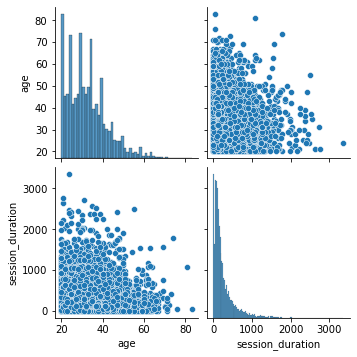

In [9]:
sns.pairplot(data[['age','session_duration']])

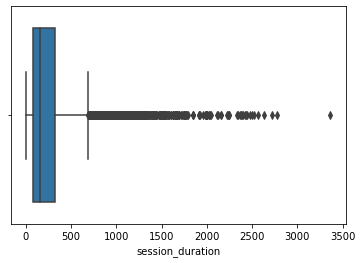

In [10]:
sns.boxplot(data['session_duration']);

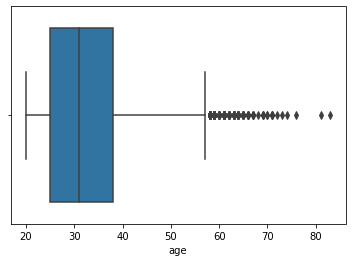

In [11]:
sns.boxplot(data['age']);

В колонке age выбросы со значением более 58, а для колонки session_duration выбросы со значением более 600

<AxesSubplot:xlabel='flag', ylabel='count'>

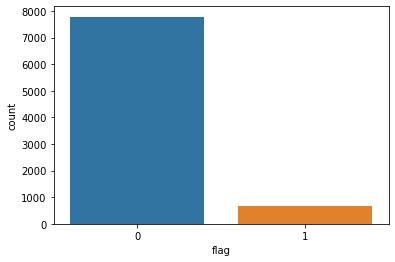

In [12]:
sns.countplot(data['flag']) # Как видно у нас классовый дисбаланс

### Выводы: В рамках исследовательского анализ  установлено, что дупликаты и нулевые значения в данных отсутствуют. Данные в признаках распределены неравномерно (гипотеза о нормальности распределения отклонена), в столбцах age и session_duration есть выбросы. Также столбцы session_duration и bounce_rate представлены в  типе данных - "float64", надо поменять на тип данных "int". Также у нас классовый дисбаланс в целевой переменной

<a id="FirstStep"></a>
## 2. Предобработка данных

Преобразуем в ручную значения колнки "user_type" из категориальных в числовые ("new": 1, "old": 0)

In [13]:
d = {"new": 1, "old": 0}
data["user_type"] = data["user_type"].map(d)
data.head()

,request_id,age,spoke_with_agent,documents_send,documents_recieved,flag,delivery_pickup,session_duration,bounce_rate,sessions,visited_partners,step_1,step_2,step_3,user_type
0,853b5d24c44a1bd3255c679fe10ae1fd,45,0,0,0,0,not_stated,0.0,1.0,1,0,0,0,0,1
1,853b5d24c44a1bd3255c679fe10ae1fd,45,0,0,0,0,delivery,171.0,0.0,1,0,1,0,0,0
2,7ae319b1bd27ca5eaf622a9421a3014d,31,1,0,0,0,pickup,40.0,0.0,1,0,0,0,0,1
3,06993ceab2ede613bce365880572460c,23,1,0,0,0,pickup,229.0,0.0,2,1,2,0,0,1
4,d9bf61f493e7e37df134a2e1284ccd00,29,1,0,0,0,pickup,152.0,0.0,1,1,0,0,0,0


Поменяем тип данных с float64 на int у следующих колонок: session_duration, bounce_rate

In [16]:
data = data.astype({ "session_duration":'int64',"bounce_rate":'int64'})

Воспользуемся объект класса LabelEncoder для применения кодировки метки к данным delivery_pickup

In [17]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
data.iloc[:, 6] = labelencoder.fit_transform(data.iloc[:, 6])

In [18]:
data.head()

,request_id,age,spoke_with_agent,documents_send,documents_recieved,flag,delivery_pickup,session_duration,bounce_rate,sessions,visited_partners,step_1,step_2,step_3,user_type
0,853b5d24c44a1bd3255c679fe10ae1fd,45,0,0,0,0,1,0,1,1,0,0,0,0,1
1,853b5d24c44a1bd3255c679fe10ae1fd,45,0,0,0,0,0,171,0,1,0,1,0,0,0
2,7ae319b1bd27ca5eaf622a9421a3014d,31,1,0,0,0,2,40,0,1,0,0,0,0,1
3,06993ceab2ede613bce365880572460c,23,1,0,0,0,2,229,0,2,1,2,0,0,1
4,d9bf61f493e7e37df134a2e1284ccd00,29,1,0,0,0,2,152,0,1,1,0,0,0,0


In [19]:
X = data.drop(['flag','request_id'], axis = 1)# разделим данные на признаки и целевую переменную для применения методов выбора признаков
y = data['flag']

### Вывод: в рамках предобработки данных мы перекодировали текстовые данные в числовые, поменяли тип данных с float64 на int у некоторых признаков, также разделили данные на признаки и целевую переменную

<a id="NewData"></a>
## 3. Выбор признаков для моделей классификации

Для выбора признаков воспользуемся тремя методами: построим корреляционную матрицу,воспользуемся SelectKBest (выбор характеристик согласно наивысшему значению k) и Rank1D 

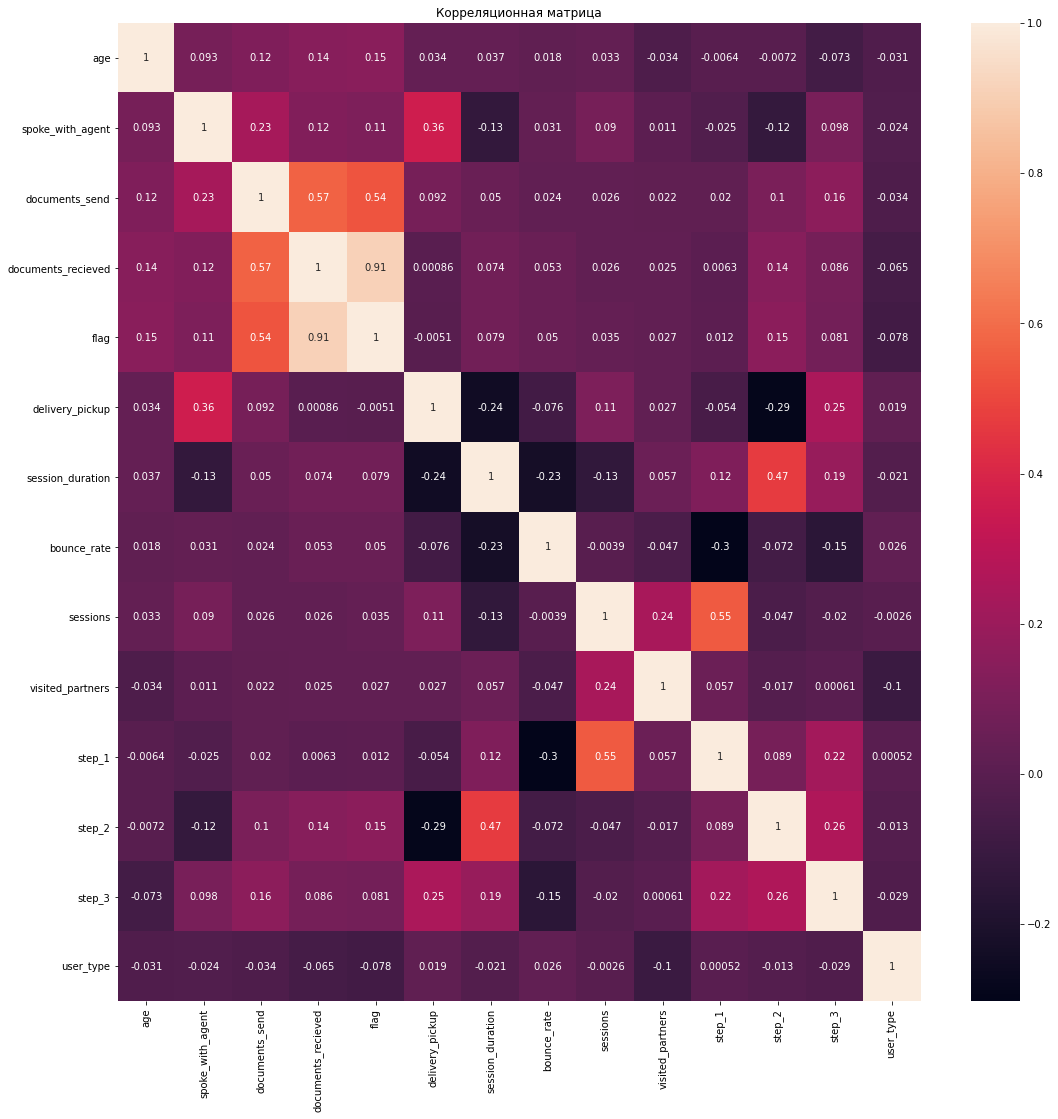

In [20]:
# Создаем корреляционную матрицу
corr_m = data.corr()
# Визуализируем матрицу при помощи sns.heatmap
plt.figure(figsize = (18, 18))
plt.title('Корреляционная матрица')
sns.heatmap(corr_m, annot = True)
plt.show()

In [21]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [22]:
bestfeatures = SelectKBest(score_func=chi2, k='all') 
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns =pd.DataFrame(X.columns)

In [23]:
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']
print(featureScores.nlargest(10,'Score'))

                 Specs         Score
5     session_duration  19730.613289
3   documents_recieved   6496.560887
2       documents_send   1923.873365
0                  age    510.469767
10              step_2    181.794520
11              step_3     43.446076
1     spoke_with_agent     36.888831
6          bounce_rate     19.911685
12           user_type     10.131028
8     visited_partners      5.931169


In [24]:
from yellowbrick.features import Rank1D

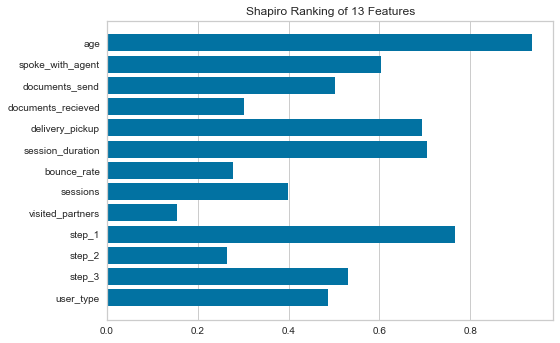

<AxesSubplot:title={'center':'Shapiro Ranking of 13 Features'}>

In [25]:
visualizer = Rank1D()
visualizer.fit(X,y)
visualizer.transform(X)
visualizer.show()

### Вывод: Как видно в рамках 3 использованных методов наибольшие значения у следующих признаков: documents_send,documents_recieved, age, session_duration, step_1. Признак documents_recieved мы не будем использовать так как он сильно коррелирует с нашей целевой переменной (если мы его будем использовать модель будет переобучаться).

Cоздадим датасет с 4 признаками для обучения модели

In [26]:
X = X[['documents_send','age','session_duration', 'step_1']]

In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = .2)

print("Размерность тренировочной выборки:", X_train.shape)
print("Размерность тестовой выборки:", X_test.shape)

Размерность тренировочной выборки: (6776, 4)
Размерность тестовой выборки: (1695, 4)


### Удалим выбросы в колонках age и session_duration в X_train

In [28]:
X_train['flag']=y_train
for x in ['age','session_duration']:
    q75,q25 = np.percentile(X_train.loc[:,x],[75,25])
    intr_qr = q75-q25

    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)

    X_train=X_train[(X_train[x] > min)&(X_train[x] < max)]

In [29]:
X_train, y_train = X_train.drop(['flag'], axis = 1), X_train['flag'] 

Сделаем стандартизацию данных  с помощью функции StandardScaler()

In [30]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train = scaler.fit_transform(X_train) 
#применяем стандартизацию к матрице признаков для тестовой выборки
X_test = scaler.transform(X_test)

Воспользуемся RandomOverSampler для увеличения числа примеров миноритарного класса.

In [31]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

ros = RandomOverSampler()

X_train, y_train = ros.fit_resample(X_train, y_train)

<a id="NewData1"></a>
## 4. Обучение моделей классификации

In [36]:
itog_val = {}# в данном словаре будет score моделей классификации
from sklearn.metrics import accuracy_score

In [37]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
logreg_prediction = logreg.predict(X_test)

In [38]:
itog_val['LogisticRegression'] = accuracy_score(logreg_prediction, y_test)

Text(0.5, 1.05, 'Confusion_matrix_LogisticRegression')

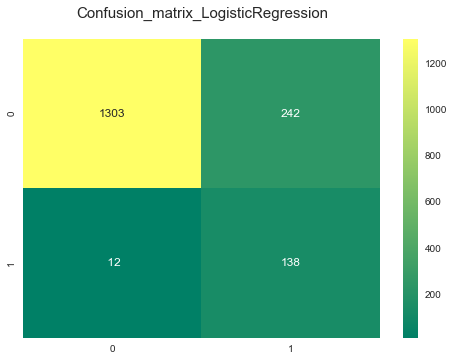

In [39]:
from sklearn.metrics import confusion_matrix # Матрица ошибок LogisticRegression
sns.heatmap(confusion_matrix(y_test,logreg_prediction),annot=True,fmt='3.0f',cmap="summer")
plt.title('Confusion_matrix_LogisticRegression', y=1.05, size=15)

In [40]:
from sklearn.tree import DecisionTreeClassifier
dec_tree = DecisionTreeClassifier(random_state = 42)
dec_tree.fit(X_train, y_train)
dec_tree_prediction = dec_tree.predict(X_test)

In [41]:
itog_val['DecisionTreeClassifier'] = accuracy_score(dec_tree_prediction, y_test)

Text(0.5, 1.05, 'Confusion_matrix_DecisionTreeClassifier')

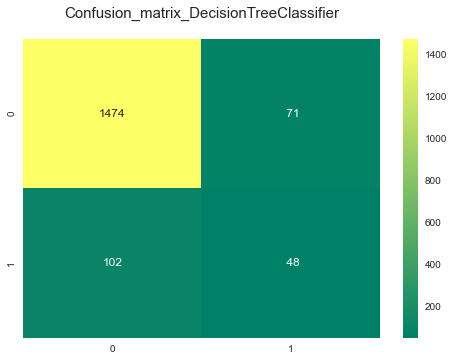

In [42]:
from sklearn.metrics import confusion_matrix # Матрица ошибок DecisionTreeClassifier
sns.heatmap(confusion_matrix(y_test,dec_tree_prediction),annot=True,fmt='3.0f',cmap="summer")
plt.title('Confusion_matrix_DecisionTreeClassifier', y=1.05, size=15)

In [43]:
from sklearn.ensemble import RandomForestClassifier
ran_for = RandomForestClassifier(random_state = 42)
ran_for.fit(X_train, y_train)
ran_for_prediction = ran_for.predict(X_test)

In [44]:
itog_val['RandomForestClassifier'] = accuracy_score(ran_for_prediction, y_test)

Text(0.5, 1.05, 'Confusion_matrix_RandomForestClassifier')

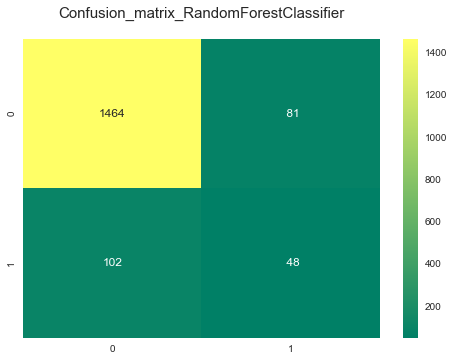

In [45]:
sns.heatmap(confusion_matrix(y_test,ran_for_prediction),annot=True,fmt='3.0f',cmap="summer")# Матрица ошибок RandomForestClassifier
plt.title('Confusion_matrix_RandomForestClassifier', y=1.05, size=15)

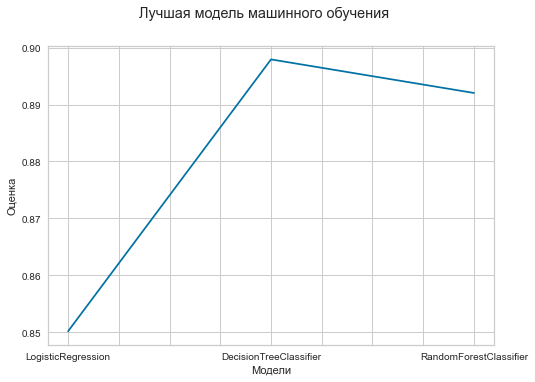

In [46]:
pd.DataFrame.from_dict(data = itog_val, orient='index').plot(legend=False)
plt.xlabel('Модели')
plt.ylabel('Оценка')
plt.suptitle('Лучшая модель машинного обучения')
plt.show()

In [47]:
itog_val # посмотрим score моделей

{'LogisticRegression': 0.8501474926253687,
 'DecisionTreeClassifier': 0.8979351032448377,
 'RandomForestClassifier': 0.8920353982300885}

Посмотрим какой признак внес больший вклад при обучении DecisionTreeClassifier

In [48]:
importances = pd.DataFrame({'feature':X.columns, 'importance':dec_tree.feature_importances_})
importances = importances.sort_values('importance',ascending=False)

In [49]:
importances

,feature,importance
0,documents_send,0.693453
2,session_duration,0.187774
1,age,0.082322
3,step_1,0.036451


### Вывод: Как видно, лучший результат показала модель - DecisionTreeClassifier, наибольший вклад в обучение данной модели внес признак documents_send